# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau``` e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree, DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

from sklearn.model_selection import train_test_split, cross_val_predict

%matplotlib inline

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

In [2]:
df = pd.read_csv('./output/mod07_df_encoded_index.csv', sep=',')
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

qtd_filhos      idade  tempo_emprego  possui_celular  \
0           0  58.832877       3.106849               1   
1           0  52.356164       8.358904               1   
2           0  46.224658       2.106849               1   
3           0  29.230137       3.021918               1   
4           0  27.482192       4.024658               1   

   possui_fone_comercial  possui_fone  possui_email  qt_pessoas_residencia  \
0                      0            0             0                    2.0   
1                      0            1             1                    1.0   
2                      1            1             1                    2.0   
3                      0            0             0                    2.0   
4                      0            1             0                    2.0   

   mau  sexo_M  ...  educacao_Secondary / secondary special  \
0    0       1  ...                                       1   
1    0       0  ...                                       1   
2    0       1  ...                                       0   
3    0       0  ...                                       0   
4    0       0  ...                                       1   

   estado_civil_Married  estado_civil_Separated  \
0                     1                       0   
1                     0                       0   
2                     1                       0   
3                     1                       0   
4                     1                       0   

   estado_civil_Single / not married  estado_civil_Widow  \
0                                  0                   0   
1                                  1                   0   
2                                  0                   0   
3                                  0                   0   
4                                  0                   0   

   tipo_residencia_House / apartment  tipo_residencia_Municipal apartment  \
0                                  1                                    0   
1                                  1                                    0   
2                                  1                                    0   
3                                  1                                    0   
4                                  1                                    0   

   tipo_residencia_Office apartment  tipo_residencia_Rented apartment  \
0                                 0                                 0   
1                                 0                                 0   
2                                 0                                 0   
3                                 0                                 0   
4                                 0                                 0   

   tipo_residencia_With parents  
0                             0  
1                             0  
2                             0  
3                             0  
4                             0  

[5 rows x 29 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6770 entries, 0 to 6769
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   qtd_filhos                              6770 non-null   int64  
 1   idade                                   6770 non-null   float64
 2   tempo_emprego                           6770 non-null   float64
 3   possui_celular                          6770 non-null   int64  
 4   possui_fone_comercial                   6770 non-null   int64  
 5   possui_fone                             6770 non-null   int64  
 6   possui_email                            6770 non-null   int64  
 7   qt_pessoas_residencia                   6770 non-null   float64
 8   mau                                     6770 non-null   int64  
 9   sexo_M                                  6770 non-null   int64  
 10  posse_de_veiculo_Y                      6770 non-null   int6

In [4]:
df.isnull().sum()

qtd_filhos                                0
idade                                     0
tempo_emprego                             0
possui_celular                            0
possui_fone_comercial                     0
possui_fone                               0
possui_email                              0
qt_pessoas_residencia                     0
mau                                       0
sexo_M                                    0
posse_de_veiculo_Y                        0
posse_de_imovel_Y                         0
tipo_renda_Pensioner                      0
tipo_renda_State servant                  0
tipo_renda_Student                        0
tipo_renda_Working                        0
educacao_Higher education                 0
educacao_Incomplete higher                0
educacao_Lower secondary                  0
educacao_Secondary / secondary special    0
estado_civil_Married                      0
estado_civil_Separated                    0
estado_civil_Single / not marrie

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau``` e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [5]:
# variável resposta
y = df.mau
y

0       0
1       0
2       0
3       0
4       0
       ..
6765    1
6766    1
6767    1
6768    1
6769    1
Name: mau, Length: 6770, dtype: int64

In [6]:
# variáveis explicativas
X = df.drop('mau', axis=1)
X

qtd_filhos      idade  tempo_emprego  possui_celular  \
0              0  58.832877       3.106849               1   
1              0  52.356164       8.358904               1   
2              0  46.224658       2.106849               1   
3              0  29.230137       3.021918               1   
4              0  27.482192       4.024658               1   
...          ...        ...            ...             ...   
6765           1  34.857534       3.101370               1   
6766           0  54.109589       9.884932               1   
6767           0  43.389041       7.380822               1   
6768           0  30.005479       9.800000               1   
6769           0  33.936986       3.630137               1   

      possui_fone_comercial  possui_fone  possui_email  qt_pessoas_residencia  \
0                         0            0             0                    2.0   
1                         0            1             1                    1.0   
2                         1            1             1                    2.0   
3                         0            0             0                    2.0   
4                         0            1             0                    2.0   
...                     ...          ...           ...                    ...   
6765                      1            1             0                    1.0   
6766                      0            0             0                    2.0   
6767                      1            1             0                    2.0   
6768                      1            0             0                    2.0   
6769                      0            1             1                    2.0   

      sexo_M  posse_de_veiculo_Y  ...  educacao_Secondary / secondary special  \
0          1                   1  ...                                       1   
1          0                   0  ...                                       1   
2          1                   1  ...                                       0   
3          0                   1  ...                                       0   
4          0                   0  ...                                       1   
...      ...                 ...  ...                                     ...   
6765       0                   0  ...                                       1   
6766       0                   0  ...                                       1   
6767       0                   0  ...                                       1   
6768       1                   1  ...                                       1   
6769       0                   0  ...                                       0   

      estado_civil_Married  estado_civil_Separated  \
0                        1                       0   
1                        0                       0   
2                        1                       0   
3                        1                       0   
4                        1                       0   
...                    ...                     ...   
6765                     0                       0   
6766                     0                       0   
6767                     1                       0   
6768                     1                       0   
6769                     1                       0   

      estado_civil_Single / not married  estado_civil_Widow  \
0                                     0                   0   
1                                     1                   0   
2                                     0                   0   
3                                     0                   0   
4                                     0                   0   
...                                 ...                 ...   
6765                                  1                   0   
6766                                  0                   0   
6767                                  0                   0   
6768                                

In [7]:
# separando a base em 70% treino e 30% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

1. Defina um objeto com a função da árvore de decisão vista em aula.

In [8]:
clf = DecisionTreeClassifier(random_state=100)

2. Treine o modelo com os dados que você separou para treinamento.

In [9]:
clf = clf.fit(X_train, y_train)

In [30]:
y_chapeu_train_predict = clf.predict(X_train)
y_chapeu_train_predict

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.

[Text(0.6555663512943163, 0.9814814814814815, 'tempo_emprego <= 4.955\ngini = 0.085\nsamples = 4739\nvalue = [4528, 211]\nclass = Aprovados'),
 Text(0.40135381495029077, 0.9444444444444444, 'tempo_emprego <= 4.949\ngini = 0.099\nsamples = 2594\nvalue = [2458, 136]\nclass = Aprovados'),
 Text(0.39835250187582066, 0.9074074074074074, 'posse_de_imovel_Y <= 0.5\ngini = 0.099\nsamples = 2592\nvalue = [2457, 135]\nclass = Aprovados'),
 Text(0.26687652410429563, 0.8703703703703703, 'estado_civil_Widow <= 0.5\ngini = 0.128\nsamples = 815\nvalue = [759, 56]\nclass = Aprovados'),
 Text(0.23512239729881823, 0.8333333333333334, 'tempo_emprego <= 4.647\ngini = 0.117\nsamples = 770\nvalue = [722, 48]\nclass = Aprovados'),
 Text(0.21213187019320953, 0.7962962962962963, 'tipo_residencia_Municipal apartment <= 0.5\ngini = 0.108\nsamples = 733\nvalue = [691, 42]\nclass = Aprovados'),
 Text(0.18716000750328268, 0.7592592592592593, 'tipo_residencia_Office apartment <= 0.5\ngini = 0.099\nsamples = 688\nval

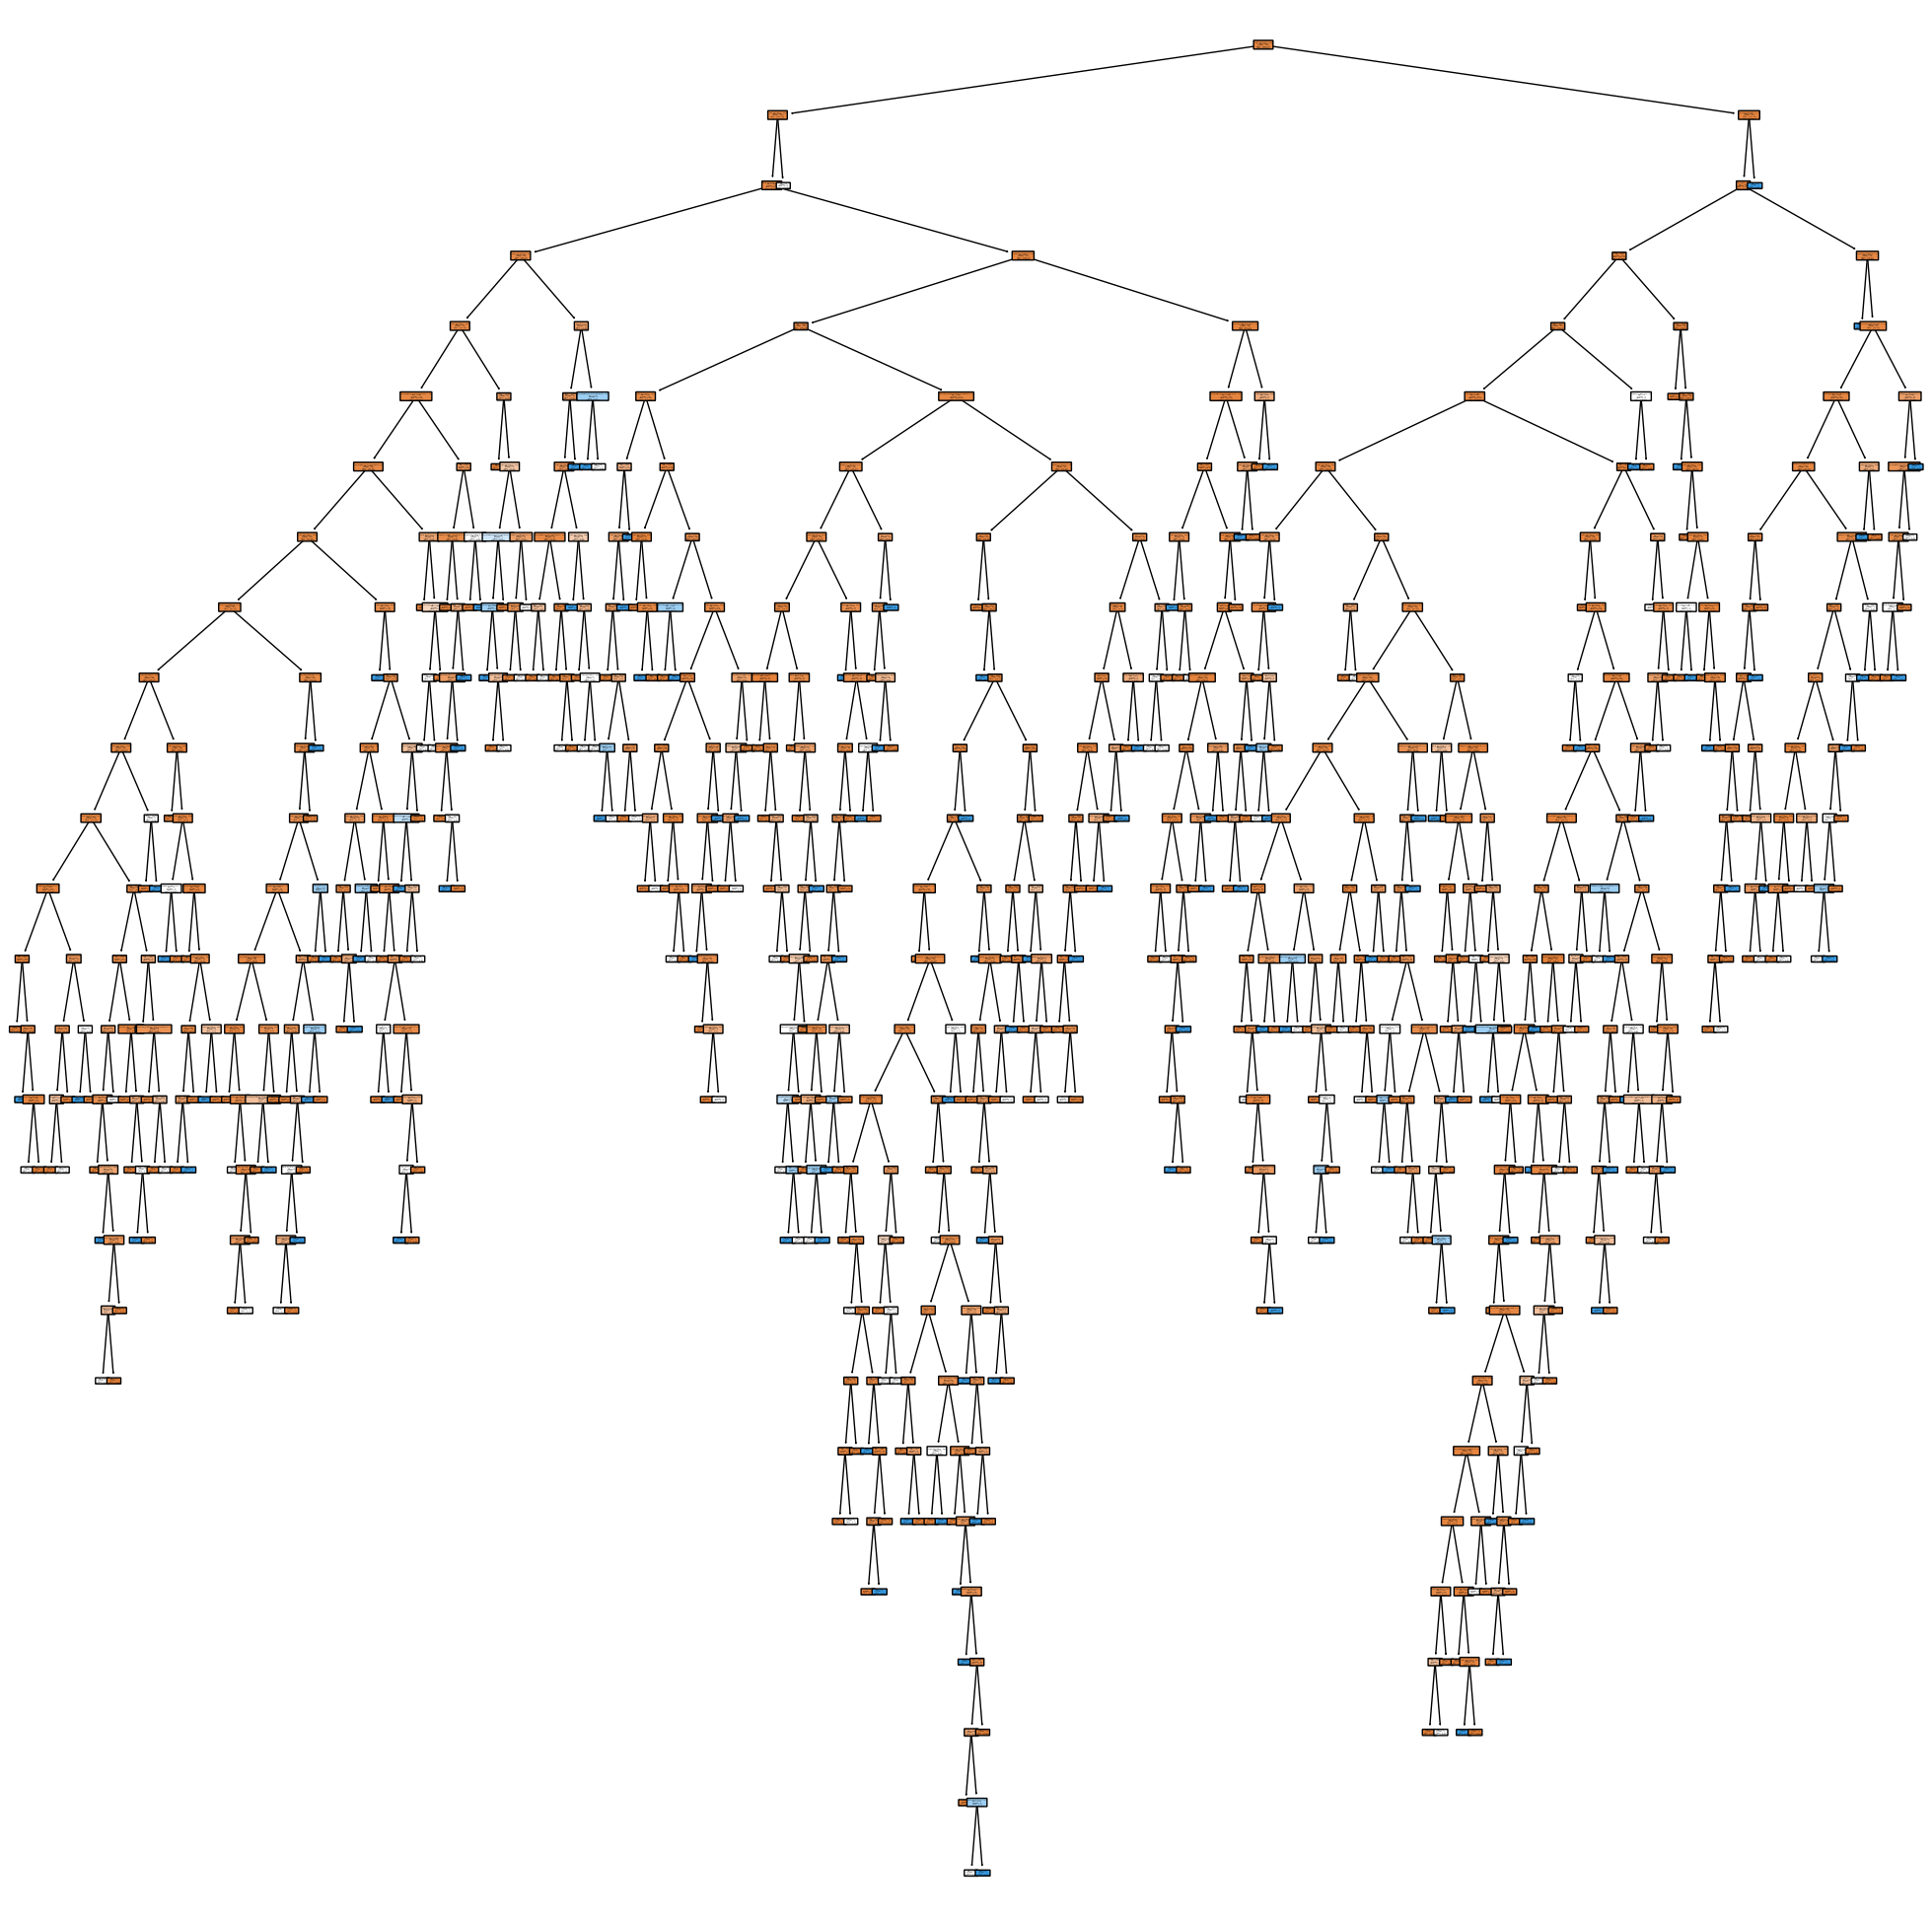

In [11]:
plt.figure(figsize=[25, 25])
plot_tree(clf,
          filled=True,
          rounded=True,
          class_names=['Aprovados', 'Reprovados'],
          feature_names=X_train.columns)

4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.

c:\Users\Joao Narciso Santos\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


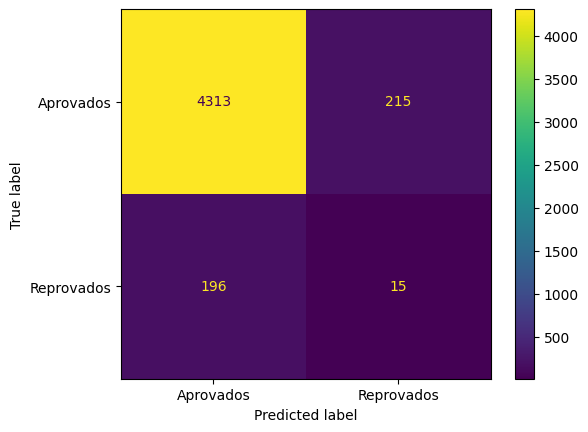

In [31]:
# matriz de confusão Treino
plot_confusion_matrix(clf, X_train, y_train, display_labels=['Aprovados', 'Reprovados'])

5. Calcule a acurácia na base de treinamento

In [32]:
accuracy_treino = 4313+215+196+15
(4313+15)/accuracy_treino

0.9132728423718084

In [33]:
accuracy_score(y_train, y_chapeu_train_predict)

0.9132728423718084

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.

In [36]:
y_chapeu_test_predict = clf.predict(X_test)
y_chapeu_test_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

2. Produza a visualização da matriz de confusão para a base de teste.

c:\Users\Joao Narciso Santos\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


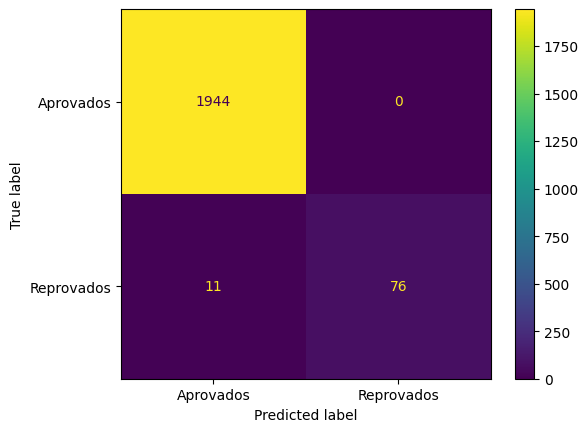

In [37]:
plot_confusion_matrix(clf, X_test, y_test, display_labels=['Aprovados', 'Reprovados'])

3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.

In [43]:
print(X_test.shape)
print(X_train.shape)

(2031, 28)
(4739, 28)


In [44]:
# acurácia base de test
print(accuracy_score(y_test, y_chapeu_test_predict))
# print((1944+76)/2031)

0.9945839487936977


In [46]:
# accurácia base de treino
print(accuracy_score(y_train, y_chapeu_train_predict))
# print((4313+15)/4739)

0.9132728423718084


4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?

In [47]:
clf_2 = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
clf_2 = clf_2.fit(X_train, y_train)

c:\Users\Joao Narciso Santos\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


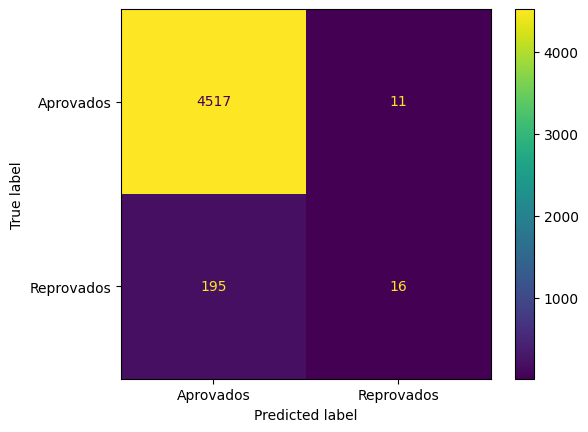

In [48]:
plot_confusion_matrix(clf_2, X_train, y_train, display_labels=['Aprovados', 'Reprovados'])

In [22]:
X_train.shape

(4739, 28)

In [54]:
print((4517+16)/4739)

0.9565309136948723


[Text(0.594777397260274, 0.9545454545454546, 'tempo_emprego <= 4.955\ngini = 0.085\nsamples = 4739\nvalue = [4528, 211]\nclass = Aprovados'),
 Text(0.3043664383561644, 0.8636363636363636, 'posse_de_imovel_Y <= 0.5\ngini = 0.099\nsamples = 2594\nvalue = [2458, 136]\nclass = Aprovados'),
 Text(0.15496575342465754, 0.7727272727272727, 'estado_civil_Widow <= 0.5\ngini = 0.13\nsamples = 817\nvalue = [760, 57]\nclass = Aprovados'),
 Text(0.12089041095890411, 0.6818181818181818, 'tempo_emprego <= 4.647\ngini = 0.119\nsamples = 772\nvalue = [723, 49]\nclass = Aprovados'),
 Text(0.09383561643835617, 0.5909090909090909, 'tipo_residencia_Municipal apartment <= 0.5\ngini = 0.108\nsamples = 733\nvalue = [691, 42]\nclass = Aprovados'),
 Text(0.07260273972602739, 0.5, 'tipo_residencia_Office apartment <= 0.5\ngini = 0.099\nsamples = 688\nvalue = [652, 36]\nclass = Aprovados'),
 Text(0.06712328767123288, 0.4090909090909091, 'tempo_emprego <= 3.816\ngini = 0.095\nsamples = 679\nvalue = [645, 34]\nclass

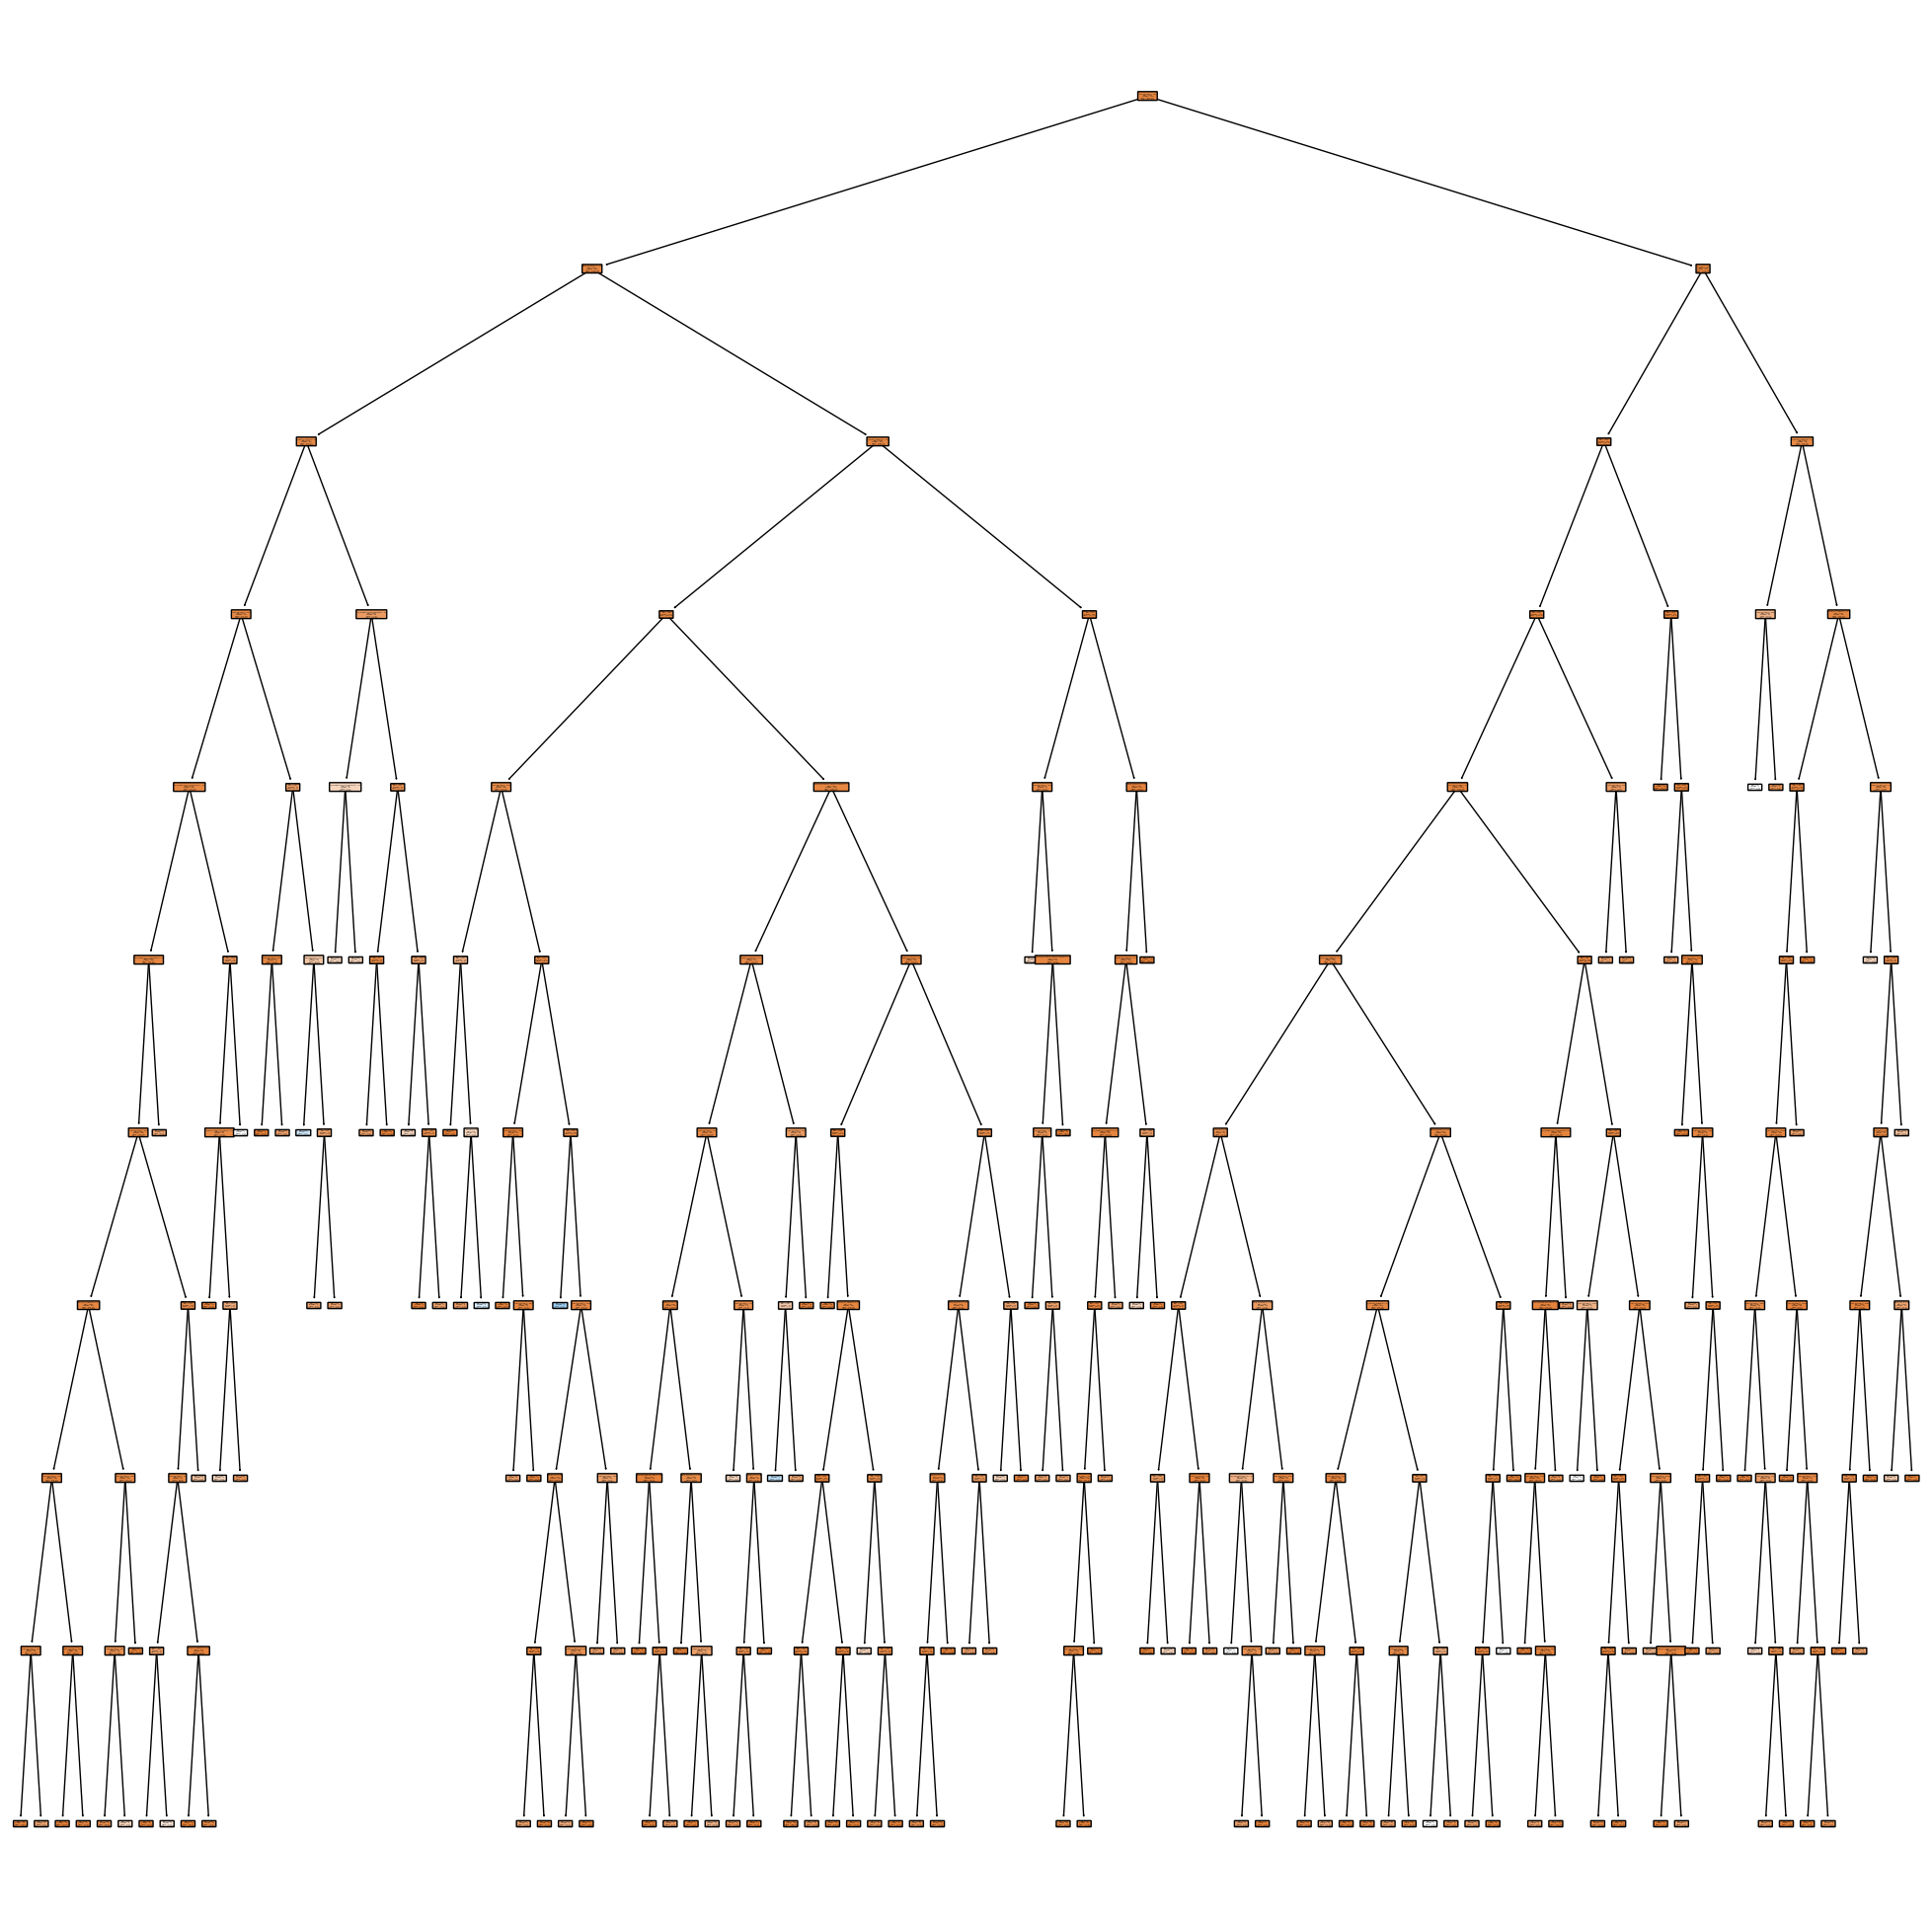

In [24]:
plt.figure(figsize=[25,25])
plot_tree(clf_2,
         filled=True,
         rounded=True,
         class_names=['Aprovados', 'Reprovados'],
         feature_names=X_train.columns)

5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [55]:
X_train.shape

(4739, 28)

In [57]:
print(f'A acurácia ficaria: {4517/4739}')

A acurácia ficaria: 0.9531546739818527
